In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
train_len = 23991
valid_len = 5140
window_len = 12 + 12 # 12 for history | 12 for future

start_ts = datetime.fromisoformat('20120301T00:00:00')
timestamps = [start_ts + timedelta(minutes = 5 * train_len) + timedelta(minutes = 5 * i) for i in range(valid_len - window_len)]

In [3]:
data_folder = '../logs/2025-02-28_11-22-25_metr-la_pred-60min_his-60min_centralized_analysis-neighbours-and-no-neighbours/val_metric'
arr_A = np.genfromtxt(f'{data_folder}/d_original.csv', delimiter=',').T
arr_B = np.genfromtxt(f'{data_folder}/d_no_neighbours.csv', delimiter=',').T
arr_y = np.genfromtxt('../data/metr-la/vel.csv', delimiter=',', skip_header = train_len+window_len-1, max_rows = valid_len-window_len).T
arr_A.shape, arr_B.shape, arr_y.shape

((207, 5116), (207, 5116), (207, 5116))

In [4]:
df = pd.DataFrame(arr_y).melt(var_name = 'timestep', value_name = 'y', ignore_index = False)
df['err_graph'] = pd.DataFrame(arr_A).melt().value
df['err_local'] = pd.DataFrame(arr_B).melt().value
df = df.reset_index(names = 'sensor')
df['timestamp'] = pd.to_timedelta(df.timestep * 5, 'minutes') + start_ts

df_A = pd.DataFrame(arr_A, columns = timestamps).rename_axis(index = 'sensor')
df_B = pd.DataFrame(arr_B, columns = timestamps).rename_axis(index = 'sensor')

In [5]:
selected_sensors = [174, 0, 114, 37, 39, 22, 71, 70]
selected_sensors = [200]

df_A = df_A.loc[selected_sensors]
df_B = df_B.loc[selected_sensors]
df = df[df['sensor'].isin(selected_sensors)]
df_y = pd.DataFrame(arr_y, columns=timestamps).rename_axis(index='sensor').loc[selected_sensors]

()

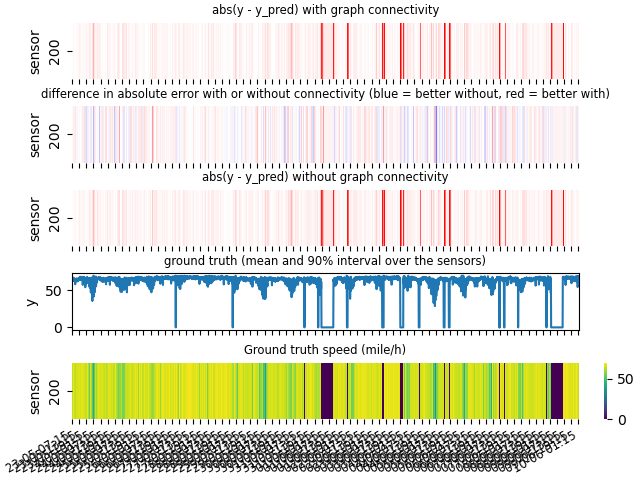

In [6]:
df_y = pd.DataFrame(arr_y, columns=timestamps).rename_axis(index='sensor')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, layout = 'constrained')
ax1.set_title('abs(y - y_pred) with graph connectivity', size = 'small')
sns.heatmap(df_A, cmap = 'bwr', ax = ax1, cbar = False, center = 0, rasterized = True)
ax2.set_title('difference in absolute error with or without connectivity (blue = better without, red = better with)', size = 'small')
sns.heatmap(df_B - df_A, cmap = 'bwr', ax = ax2, cbar = False, center = 0, rasterized = True)
ax3.set_title('abs(y - y_pred) without graph connectivity', size = 'small')
sns.heatmap(df_B, cmap = 'bwr', ax = ax3, cbar = False, center = 0, rasterized = True)
ax4.set_title('ground truth (mean and 90% interval over the sensors)', size = 'small')
sns.lineplot(df, x = 'timestep', y = 'y', errorbar = ('pi', 90), ax = ax4)
ax5.set_title('Ground truth speed (mile/h)', size='small')
sns.heatmap(df_y.loc[selected_sensors], cmap='viridis', ax=ax5, cbar=True, rasterized=True)
ax5.set_xticks(list(range(0, valid_len - window_len, 12*6)), [ts.strftime('%d-%m %H:%M') for ts in timestamps[::12*6]], rotation = 30, ha = 'right', size = 'small')
()

NameError: name 'df_y' is not defined

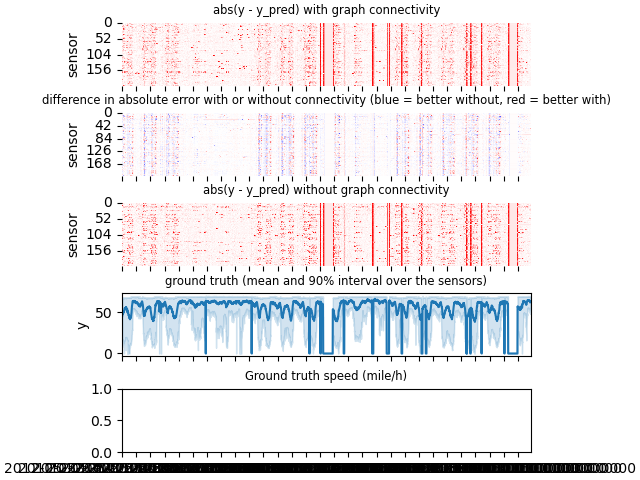

In [6]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, layout = 'constrained')
ax1.set_title('abs(y - y_pred) with graph connectivity', size = 'small')
sns.heatmap(df_A, cmap = 'bwr', ax = ax1, cbar = False, center = 0, rasterized = True)
ax2.set_title('difference in absolute error with or without connectivity (blue = better without, red = better with)', size = 'small')
sns.heatmap(df_B - df_A, cmap = 'bwr', ax = ax2, cbar = False, center = 0, rasterized = True)
ax3.set_title('abs(y - y_pred) without graph connectivity', size = 'small')
sns.heatmap(df_B, cmap = 'bwr', ax = ax3, cbar = False, center = 0, rasterized = True)
ax4.set_title('ground truth (mean and 90% interval over the sensors)', size = 'small')
sns.lineplot(df, x = 'timestep', y = 'y', errorbar = ('pi', 90), ax = ax4)
ax5.set_title('Ground truth speed (mile/h)', size='small')
sns.heatmap(df_y, cmap='viridis', ax=ax5, cbar=True, rasterized=True)
ax5.set_xticks(list(range(0, valid_len - window_len, 12*6)), [ts.strftime('%d-%m %H:%M') for ts in timestamps[::12*6]], rotation = 30, ha = 'right', size = 'small')
()

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
num_clusters = 6
kmeans = TimeSeriesKMeans(num_clusters)
sensor_clusters = kmeans.fit_predict(arr_y)
df['sensor_cluster'] = sensor_clusters[df.sensor]
df.sensor_cluster.value_counts() / (valid_len - window_len)

In [ ]:
sns.relplot(df, x = 'timestamp', y = 'y', errorbar = ('pi', 90), kind = 'line', col = 'sensor_cluster', col_wrap = 2)